In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib as plt
import seaborn as sns


Primero que todo leemos el .CSV con toda la información

In [2]:
data = pd.read_csv('../input/evolution-of-smartphones/Smartphone_Evolution.csv')

Ahora podemos tomar esta información y previsualizar lo que obtuvimos por medio de la consulta de la base de datos:

In [3]:
data.head()

,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows Phone 8.1,NaN,1950.0,Qualcomm Snapdragon 200,0.5,4.0,microSDXC,4.0,800 x 480,NaN,5.0,0.3
1,ARCHOS,40 Titanium,Android 4.2.2,NaN,1500.0,MediaTek,0.5,NaN,microSDHC,4.0,800 x 480,NaN,5.0,0.3
2,ARCHOS,40b Titanium,Android 4.2.2,NaN,1400.0,MediaTek,0.5,4.0,microSD,4.0,800 x 480,NaN,5.0,0.3
3,ARCHOS,45 Titanium,Android 4.2.2,NaN,1680.0,MediaTek,0.5,NaN,microSDHC,4.5,854 x 480,NaN,5.0,0.3
4,ARCHOS,45b Helium 4G,Android 4.4.4,NaN,1850.0,Qualcomm Snapdragon 410,0.5,4.0,microSDXC,4.5,854 x 480,NaN,5.0,0.3


In [4]:
data.shape

(4537, 14)

In [5]:
data.describe()

,Battery,Memory,Primary_Storage,Display_Size,Display_Refresh_Rate,Primary_Camera
count,4368.000000,4065.000000,3820.000000,4304.000000,310.000000,4438.000000
mean,2426.713370,2.023093,34.296597,4.735874,96.629032,11.714736
std,1169.892059,2.295884,59.047526,1.174930,27.908330,15.481491
min,500.000000,0.020000,0.000000,1.800000,60.000000,0.000000
25%,1500.000000,0.500000,4.000000,4.000000,60.000000,5.000000
50%,2050.000000,1.000000,8.000000,5.000000,90.000000,8.000000
75%,3000.000000,3.000000,32.000000,5.500000,120.000000,13.000000
max,8580.000000,32.000000,512.000000,10.100000,165.000000,108.000000


Nuestra base de datos tiene 4537 filas y 14 columnas. También pudimos ver las primeras filas de nuestro archivo. Ahora revisamos si hay valores vacíos:

In [6]:
data.isnull().values.any()

cuentaVacios = data.isnull().sum()
print(cuentaVacios)

Brand                      0
Model                      0
OS                        18
Release_Date            2190
Battery                  169
Processor               1429
Memory                   472
Primary_Storage          717
External_Storage          55
Display_Size             233
Display_Resolution        82
Display_Refresh_Rate    4227
Primary_Camera            99
Front_Camera            1233
dtype: int64


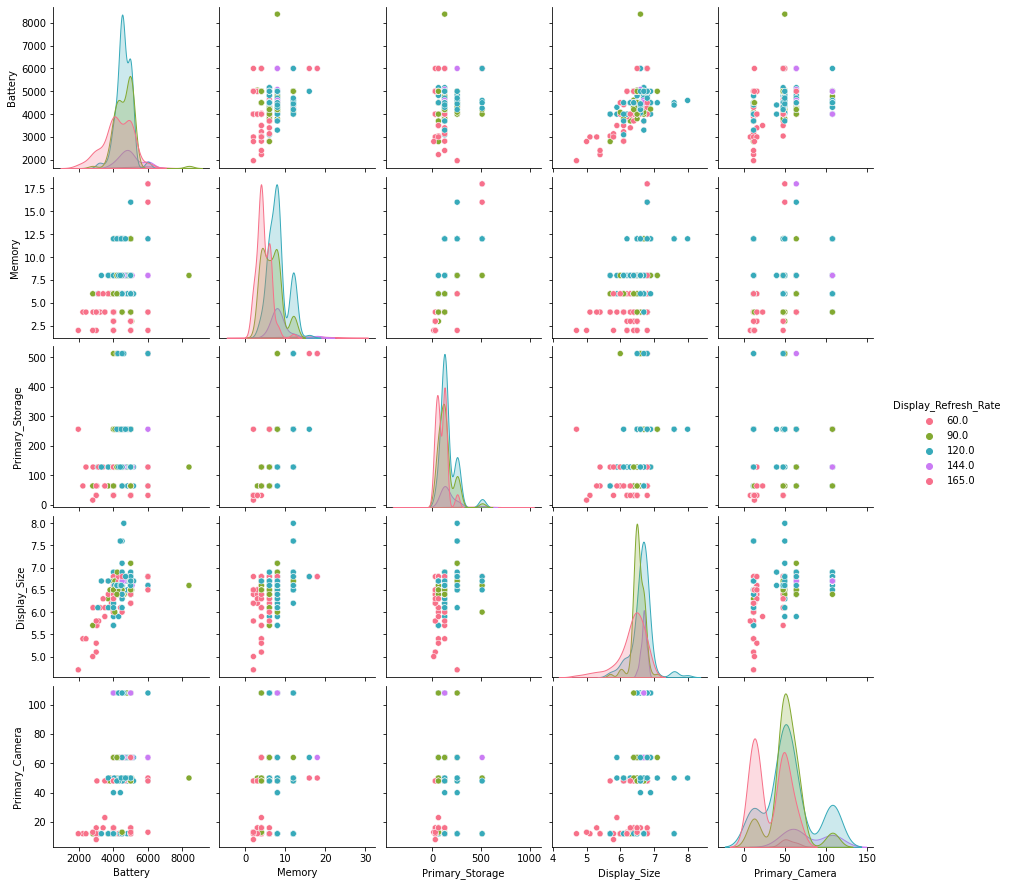

In [7]:
 g = sns.pairplot(data, hue="Display_Refresh_Rate", palette="husl")


Rellenamos los datos vacíos con ceros, para evitar errores

In [8]:
cleanData = data.fillna(0)

cuentaVacios = cleanData.isnull().sum()
print(cuentaVacios)
cleanData.head()

Brand                   0
Model                   0
OS                      0
Release_Date            0
Battery                 0
Processor               0
Memory                  0
Primary_Storage         0
External_Storage        0
Display_Size            0
Display_Resolution      0
Display_Refresh_Rate    0
Primary_Camera          0
Front_Camera            0
dtype: int64


,Brand,Model,OS,Release_Date,Battery,Processor,Memory,Primary_Storage,External_Storage,Display_Size,Display_Resolution,Display_Refresh_Rate,Primary_Camera,Front_Camera
0,ARCHOS,40 Cesium,Windows Phone 8.1,0,1950.0,Qualcomm Snapdragon 200,0.5,4.0,microSDXC,4.0,800 x 480,0.0,5.0,0.3
1,ARCHOS,40 Titanium,Android 4.2.2,0,1500.0,MediaTek,0.5,0.0,microSDHC,4.0,800 x 480,0.0,5.0,0.3
2,ARCHOS,40b Titanium,Android 4.2.2,0,1400.0,MediaTek,0.5,4.0,microSD,4.0,800 x 480,0.0,5.0,0.3
3,ARCHOS,45 Titanium,Android 4.2.2,0,1680.0,MediaTek,0.5,0.0,microSDHC,4.5,854 x 480,0.0,5.0,0.3
4,ARCHOS,45b Helium 4G,Android 4.4.4,0,1850.0,Qualcomm Snapdragon 410,0.5,4.0,microSDXC,4.5,854 x 480,0.0,5.0,0.3


Hagamos un resumen por fabricante, y por sistemas operativos:

          Model
Brand          
ARCHOS       25
AT&T          6
Acer         60
Airo          1
Alcatel     148
...         ...
i-mobile      9
mobiado       1
nubia        25
realme       13
vivo         25

[113 rows x 1 columns]


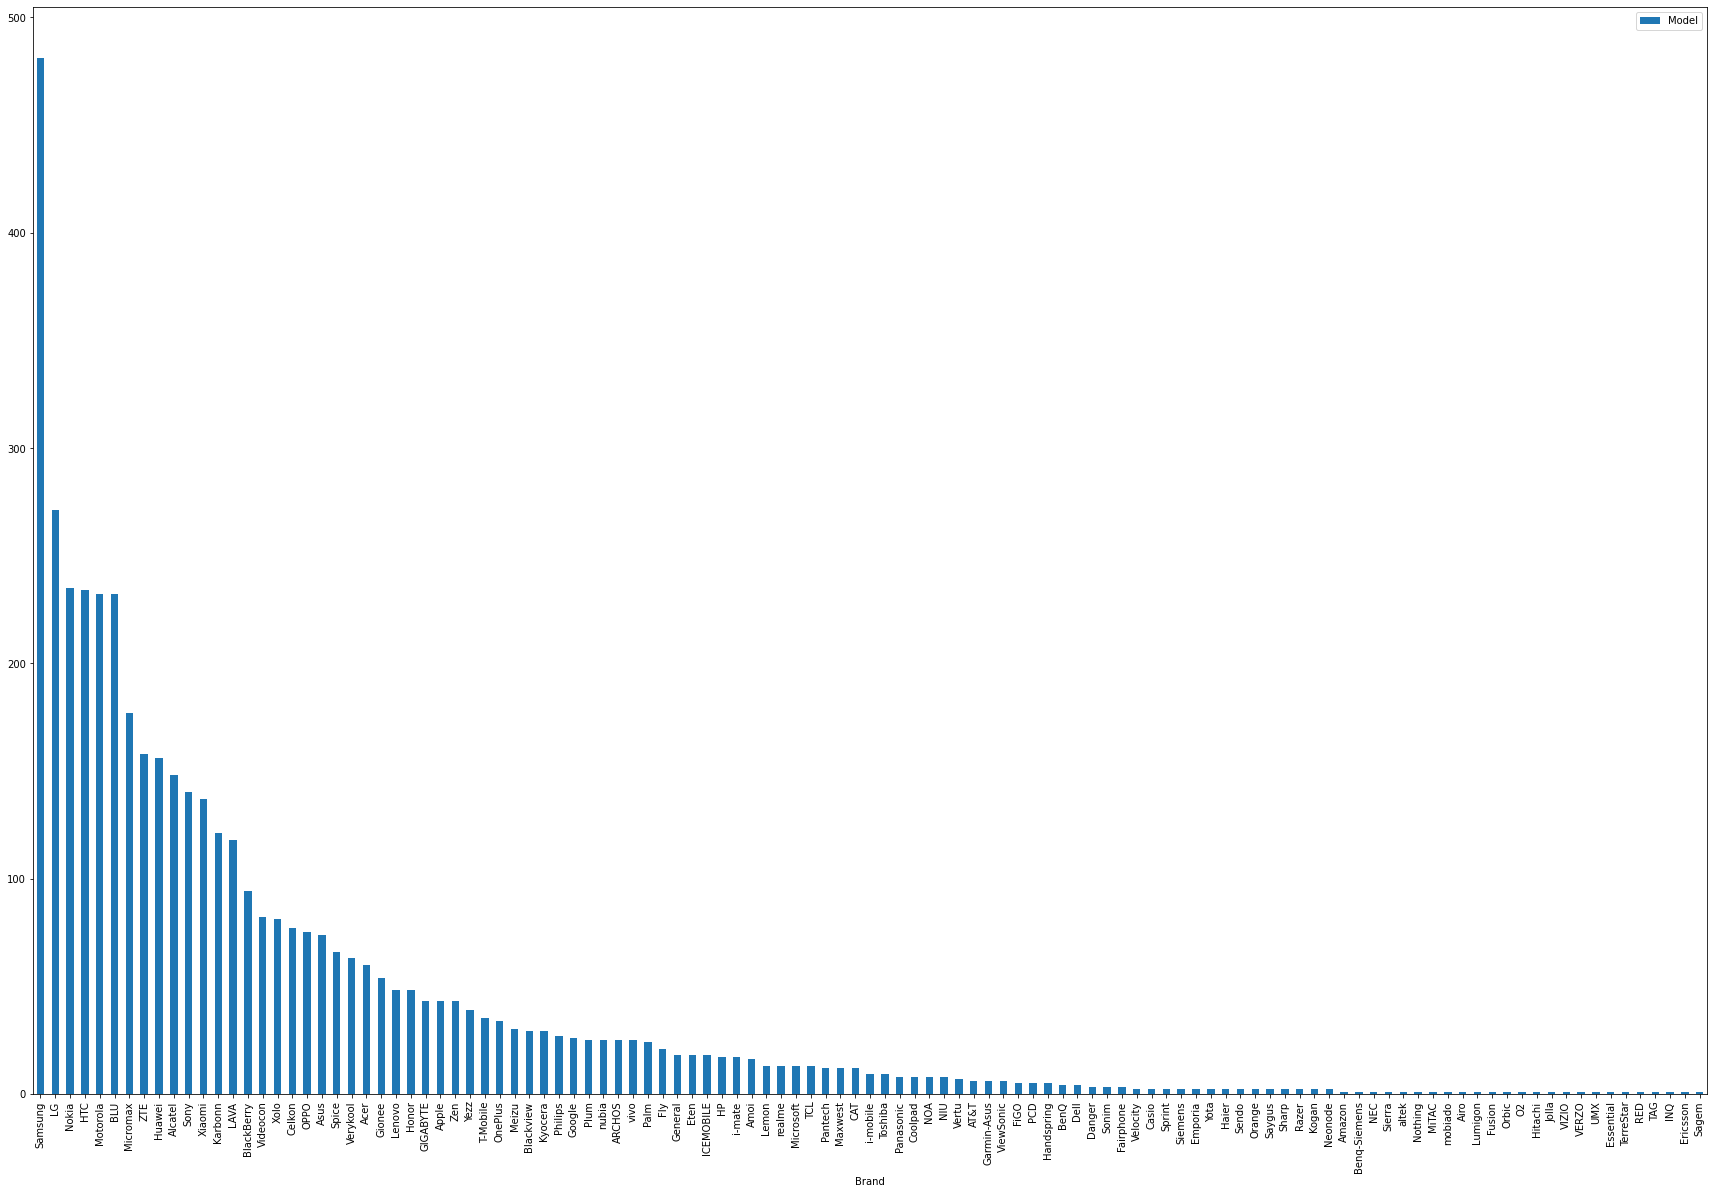

In [9]:
#Esta linea crea lo que conocemos como "tabla dinámica" donde en la fila ponemos la marca
#y en las columnas ponemos -nada- con una cuenta de Modelos
dinamica = pd.pivot_table(cleanData,index="Brand",values="Model",aggfunc='count')
print(dinamica)
# ahora organizamos de mayor a menor
dinamica.sort_values(by = ['Model'], ascending=False, inplace = True)
#y graficamos como Matplotlib
dinamica.plot(kind='bar', stacked=True, figsize=(30,20)).legend(bbox_to_anchor=(1.0, 1.0));


Hagamos lo mismo con los sistemas operativos:

             Model
OS                
0               18
Android         75
Android 1.5     12
Android 1.6     15
Android 10     224
...            ...
webOS            3
webOS 1.3.5      3
webOS 1.4        1
webOS 2.1        2
webOS 2.2        3

[150 rows x 1 columns]


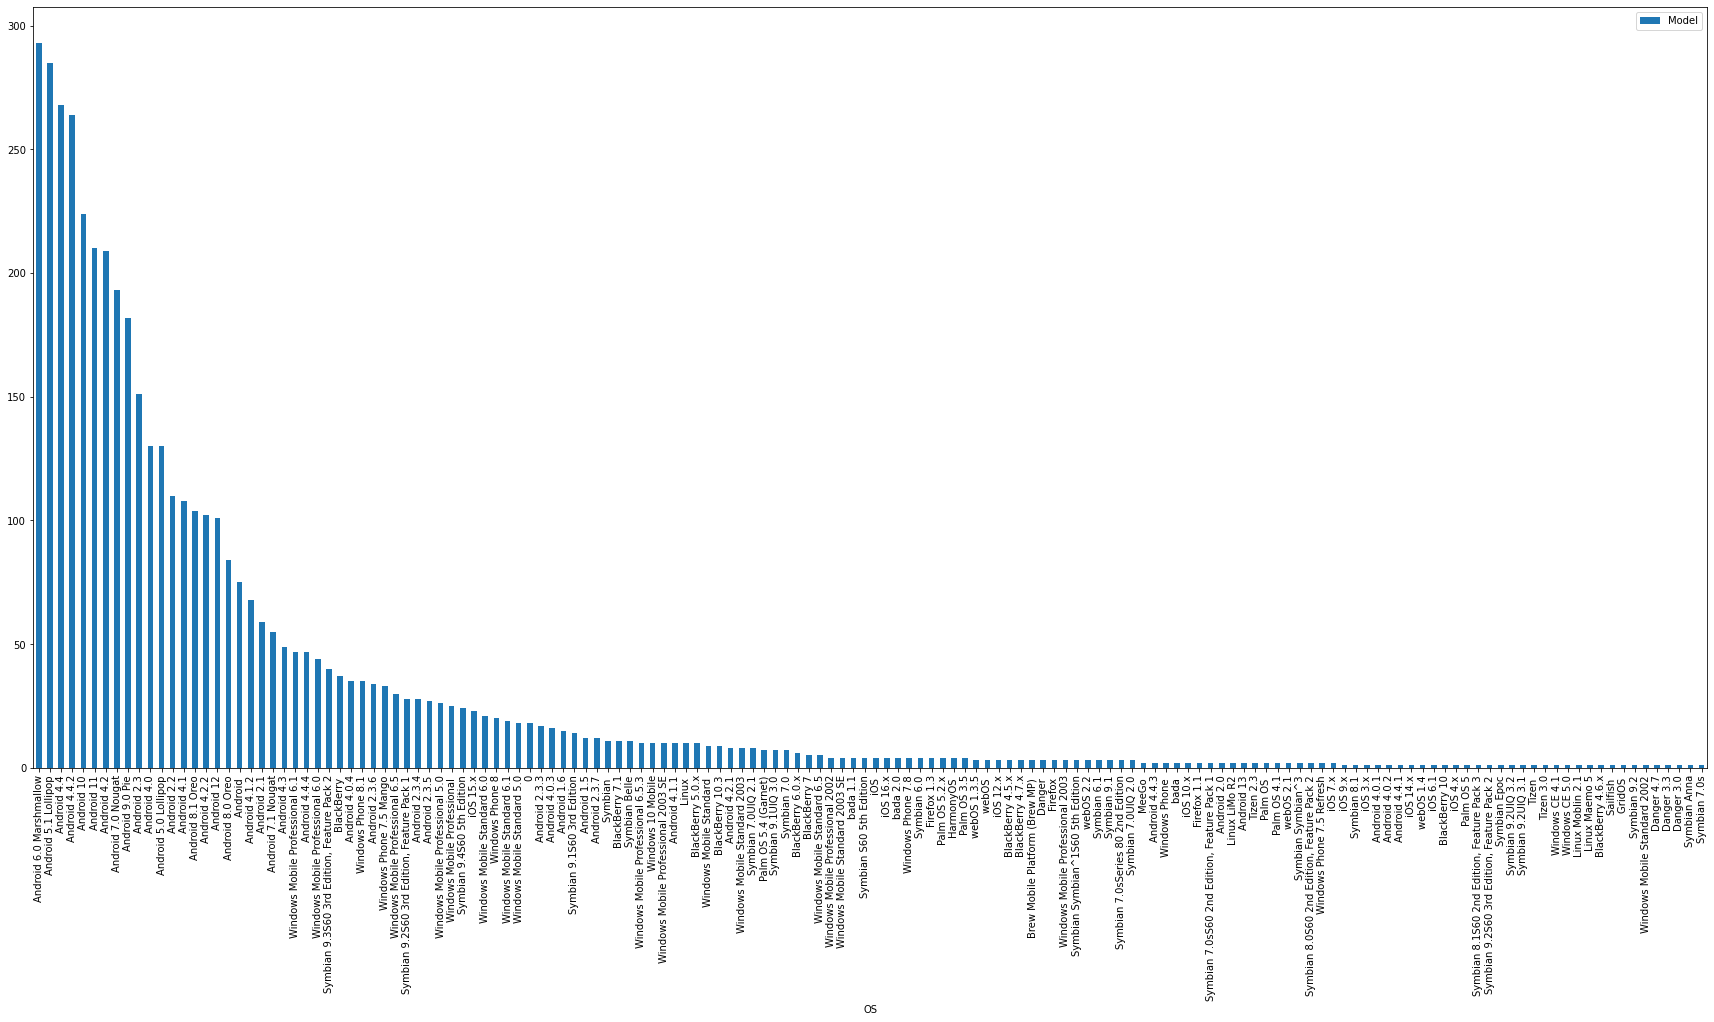

In [10]:
dinamica = pd.pivot_table(cleanData,index="OS",values="Model",aggfunc='count')
print(dinamica)
# ahora organizamos de mayor a menor
dinamica.sort_values(by = ['Model'], ascending=False, inplace = True)
#y graficamos como Matplotlib
dinamica.plot(kind='bar', stacked=True, figsize=(30,14)).legend(bbox_to_anchor=(1.0, 1.0));

Hagamos otra visualización donde podamos ver el tipo de almacenamiento externo:

                          Model
External_Storage               
0                            55
                            314
 MMC                         31
 Memory Stick Duo             4
 Memory Stick Micro (M2)      5
 Nano Memory (NM)            22
 RS-MMC                      12
 SD                          45
 microSD                    214
 microSDHC                 2126
 microSDXC                 1438
 miniSD                      50
 miniSDHC                     2
 not expandable             216
 not expandable               3


array([<AxesSubplot:ylabel='Model'>], dtype=object)

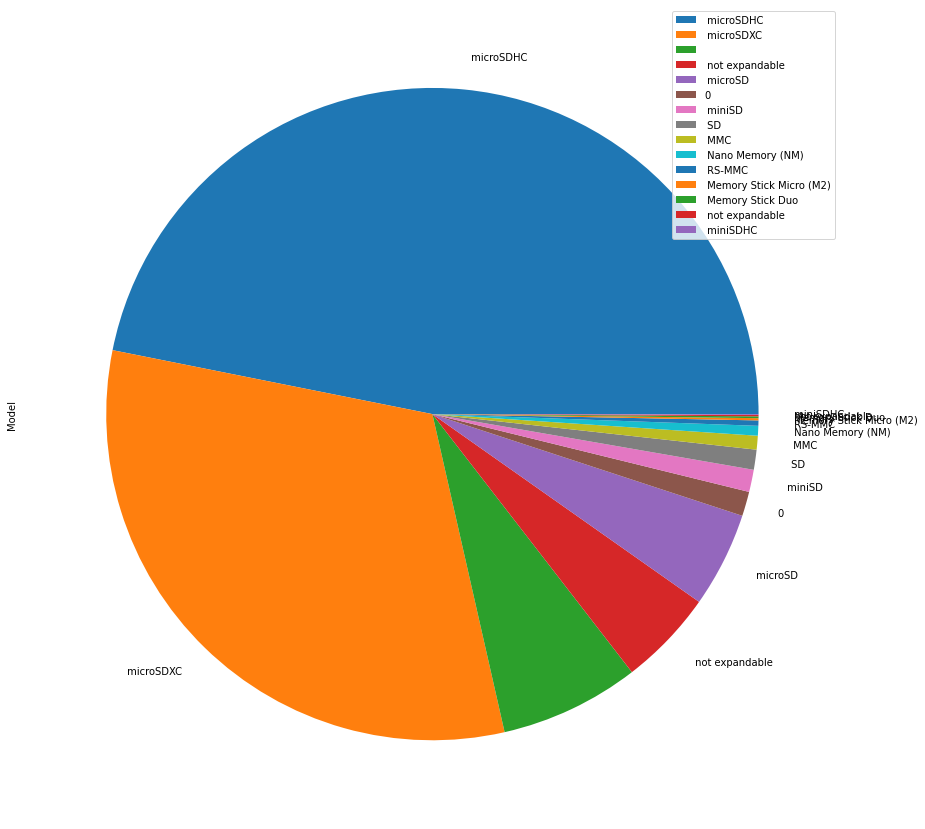

In [11]:
dinamica = pd.pivot_table(cleanData,index="External_Storage",values="Model",aggfunc='count')
print(dinamica)
#ahora organizamos de mayor a menor
dinamica.sort_values(by = ['Model'], ascending=False, inplace = True)
#y graficamos como Matplotlib
dinamica.plot(kind='pie',figsize=(15,15),subplots=True)
